# Titanic

- The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

- It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

- The Objective of this notebook is to give an idea how is the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

<img src="https://wdfyfe.files.wordpress.com/2012/04/titanic.jpg"
    style="width:50%; margin: 0 auto "></img>



**DataSet**  :   [Titanic-Dataset](https://drive.google.com/drive/u/2/folders/13dpzjmBgQN-m0t9rw7K46fbHW-tJNqjM)


### Contents of the Notebook:

- ### Part 1 EDA (Data Exploratory Analysis:



 - Analysis of the features.
 
 - Finding any relations or trends considering multiple features.
 
 
- ### Part 2: Feature Engineering and Data Cleaning:


 - Adding any few features.

 - Removing redundant features.

 - Converting features into suitable form for modeling.
 
 
- ### Part3: Predictive Modeling


 - Running Basic Algorithms.

 - Cross Validation.

 - Ensembling.

 - Important Features Extraction.

## Part 1:  EDA -  Exploratory Data Analysis

### Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For stylish plot
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load data

In [12]:
data = pd.read_csv('Titanic-Dataset.csv')

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking for total null values

In [22]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 - The Age, Cabin and Embarked have null values. I will try to fix them.
 ----------------------------------------------------------------------------

### Number of Survived 

In [81]:
print("Total People in titanic : " , data['Survived'].count())
print("UnSurvived-0 : " , data['Survived'].value_counts()[0])
print("Survived-1 : " , data['Survived'].value_counts()[1])

Total People in titanic :  891
UnSurvived-0 :  549
Survived-1 :  342


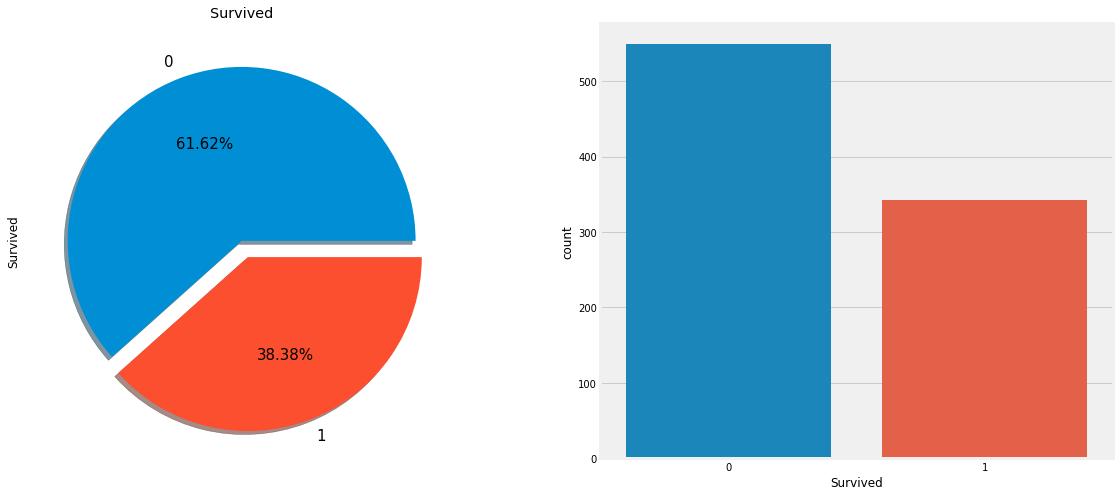

In [64]:
f,ax = plt.subplots(1,2 ,figsize=(18,8))

#pie Chart 
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',fontsize=15,ax=ax[0],shadow=True)
ax[0].set_title("Survived")



#2nd plot - Countplor
sns.countplot('Survived',data=data , ax=ax[1])

plt.show()

- Out of 891 passengers in training set, only around 350 survived  Only **38.4%** of the total training set survived the crash.

# Types Of Features
### Categorical Features:
 - categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
 - Categorical Features in the dataset: Sex,Embarked.

### Ordinal Features:
 - An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
 - Ordinal Features in the dataset: PClass

### Continous Feature:
- A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
- Continous Features in the dataset: Age

## Analysing The Features
---------------------------------------

- ###  Sex  (Categorical Feature)

In [137]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [138]:
pd.crosstab(data['Sex'],data.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


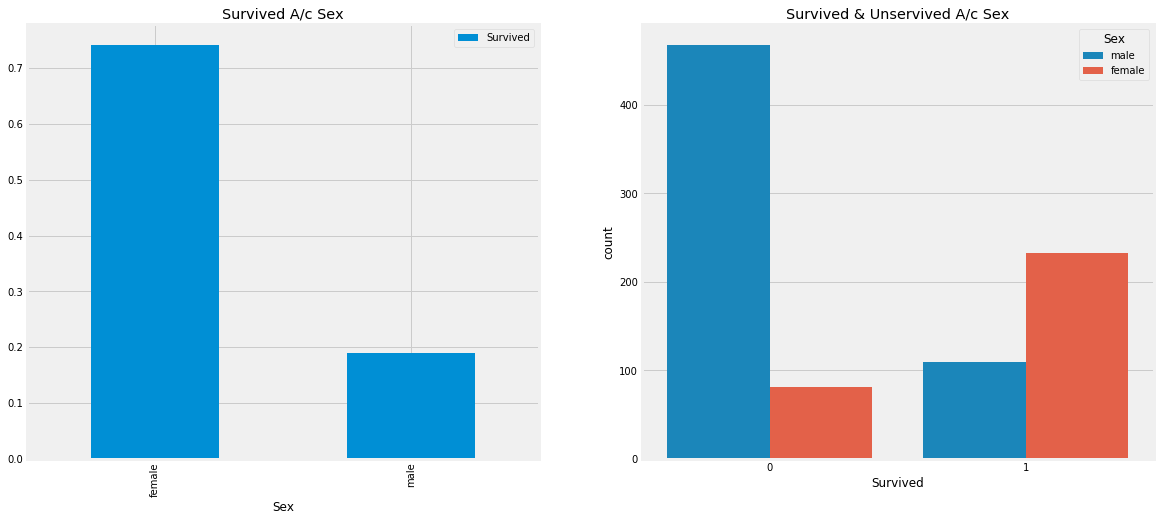

In [139]:
f,ax = plt.subplots(1,2,figsize=(18,8))


data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived A/c Sex")

# Countplot
ax[1].set_title("Survived & Unservived A/c Sex")

sns.countplot("Survived" , hue='Sex' , data=data , ax=ax[1])

plt.show()


- This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

In [140]:
pd.crosstab(data['Sex'],data.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- ## Pclass (Ordinal Feature)

In [141]:
pd.crosstab(data['Pclass'],data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


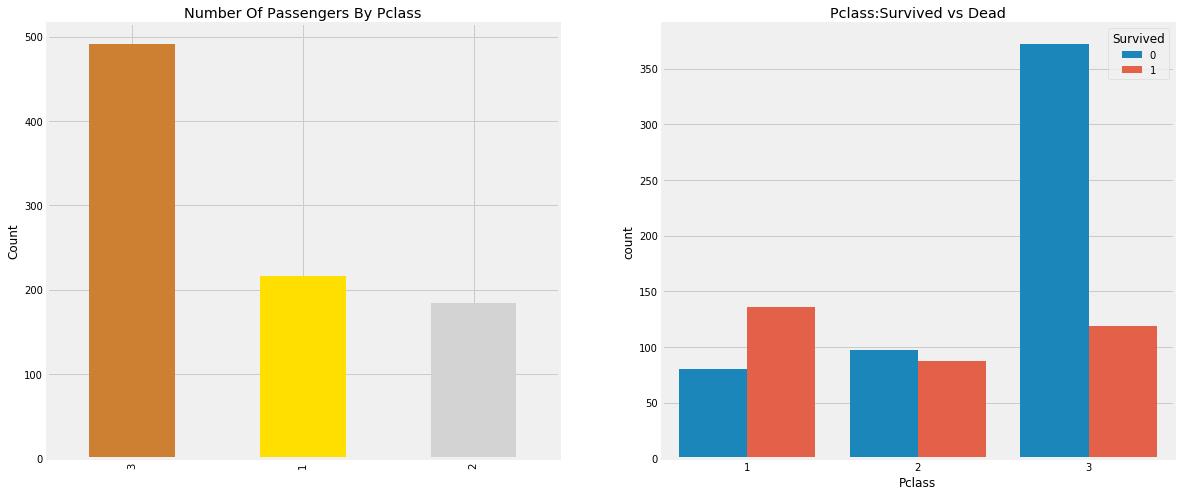

In [142]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()